# Background Information

Since the perceptron rule and Adaline are very similar, we will take the perceptron implementation that we defined earlier and change the ```fit``` method so that the weights are updted by minimising the cost function via gradient descent:

In [1]:
class AdalineGD(object):
    """
    ADAptive LInear NEuron classifier.
    
    ----------
    Parameters
    ----------
    eta: float
        The learning rate (between 0.0 and 1.0)
    n_iter: int
        The number of passes over the training dataset.
    random_state: int
        The Random Number Generator seed for random weight initialisation.
    
    ----------
    Attributes
    ----------
    w_: 1d array
        The weights after fitting.
    cost_: list
        The sum-of-squares cost function value in each epoch (in each pass of n_iter)
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def net_input(self, X):
        """
        Calculate the net input
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]*1.0
    
    def activation(self, X):
        """
        Compute the linear activation function output
        """
        return X
    
    def predict(self, X):
        """
        Return the class label by applying the threshold function
        """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def fit(self, X, y):
        """
        Fit the training data.
        
        ----------
        Parameters
        ----------
        X: array-like with shape of [n_samples rows, by n_features columns]
            X is the Training dataset, where n_samples is the number of flowers,
            and n_features is the number of dimensions, or columns.
        y: array-like with shape of [n_samples rows].
            y is the target values; the true class labels.
        
        -------
        Returns
        -------
        self: object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)  # the true class label minus the calculated outcome
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum() * 1.0
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

# Comments on the above code

Instead of updating the weights after evaluating each individual training sample (as in the perceptron), here we calculate the gradient based on the whole training dataset via
```python
self.eta * errors.sum()
```
for the bias unit (zeroth-weight), and via
```python
self.eta * X.T.dot(errors)
```
for the weights 1 --> m, where ```X.T.dot(errors)``` is a matrix-vector multiplication between our feature matrix and the error vector.

It should be noted that the ```activation``` method has no effect in the code since it is simply an identity function.  Here we added the activation function (computed via the ```activation``` method) to illustrate how information flows through a single-layer neural network: features from the input data, net input, activation, and output.  

In the next chapter we will learn about a logistic regression classifier that uses a non-identity, nonlinear activation function.  We will see that a logistic regression model is closely related to Adaline with the only difference being its activation and cost function.

Now, similar to the previous perceptron implmentation, we collect the cost values in a ```self.cost_``` list to check whether the algorithm converges after a number of epochs.

In practice, it often requires some experimentation to find a good learing rate $\eta$ for optimal convergence.  In the upcoming code, we will choose two different learning rates, $\eta = 0.1$ and $\eta = 0.0001$ to start with and plot the cost functions versus the number of epochs to see how well the Adaline implementation learns from the training data.

## Note on Hyperparameters
The learning rate $\eta$, as well as the number of epochs ```(n_iter```), are the so-called hyperparameters of the perceptron and Adaline learning algorithms.

# Let us now proceed to plot the cost against the number of epochs for 2 different learning rates

In [2]:
import pandas as pd

df = pd.read_csv("/home/henri/stuff/machine_learning/sebastian_raschka/henris_coding/chapter_02/iris.data",
                 header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np

"""
In this block of code we extract the X training data set,
as well as y, the true class labels.
"""

# select the setosa and versicolor Iris samples
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract the sepal length and the petal length features
X = df.iloc[0:100, [0, 2]].values

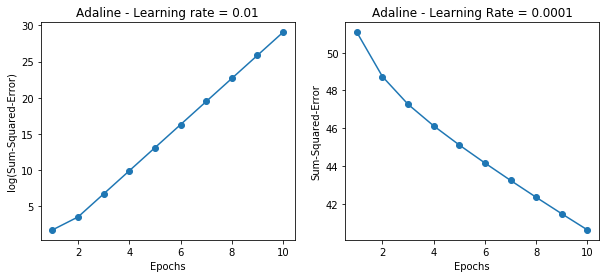

In [5]:
# Here follows the Adaline coding on pages 40 and 41 of the paperback book.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared-Error)')
ax[0].set_title('Adaline - Learning rate = 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-Squared-Error')
ax[1].set_title('Adaline - Learning Rate = 0.0001')
plt.show()

# Standardisation, a.k.a. feature scaling

Standardisation gives our data the property of a standard normal distribution.

It shifts the **mean** of each feature so that it is centered at 0.
Each feature also has a **standard deviation** of 1.

For example, to standardise the $j^{\mathrm{th}}$ feature, we can simply subtract the sample mean, $\mu_j$, from every training sample and divide it by its standard deviation, $\sigma_j$:

$$
\mathbf{x}_j^{'} = \frac{\mathbf{x}_j^{'} - \mu_j}{\sigma_j}
$$

where $\mathbf{x}_j$ is a vector consisting of the $j^{\mathrm{th}}$ feature values of all training samples $n$, and this standardisation technique is applied to each feature $j$ in our dataset.

One of the reasons why standardisation helps with gradient descent learning is that the optimiser has to go through fewer epochs to find an optimal solution.

## Applying the standardisation to our Iris dataset:

In [6]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std() # all the rows of the first column
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std() # all the rows of the second column

Now that the $\mathbf{X}$ feature matrix has been scaled, we will train Adaline again and see that it now converges after a small number of epochs using a learning rate of $\eta = 0.01$:

In [7]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

# Convenience function to visualise the decision boundary:

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # Setup the marker generator and the color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot the class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

# Code the plotting with the help of the convenience function:

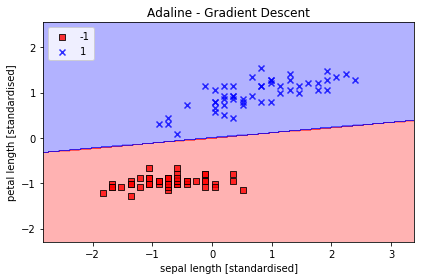

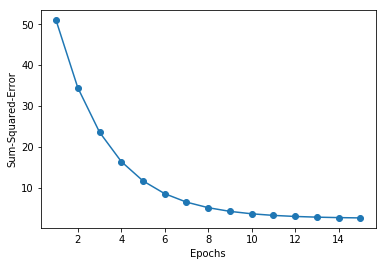

In [11]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardised]')
plt.ylabel('petal length [standardised]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared-Error')
plt.show()

# Stochastic Gradient Descent

Inside the ```fit``` method, we will now update the weights after each training sample.  Furthermore, we will implement an additional partial_fit method, which does not reinitialise the weights, for online learning.

In order to check whether our algorithm converged after training, we will calculate the cost as the average cost of the training samples in each epoch.  Furthermore, wee will add an option to shuffle the training data before each epoch to avoid repetitive cycles when we are optimizing the cost function.

Via the ```random_state``` parameter, we allow the specification of a random seed for reproducibility.

In [20]:
class AdalineSGD(object):
    """
    ADAptive LInear NEuron classifier.
    
    ----------
    Parameters
    ----------
    eta: float
        Learing rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset.
    shuffle: bool (True or False; the default is True)
        Shuffles the training data every epoch if True in order to prevent cycles.
    random_state: int
        Random number generator seed for random weight initialisation
    
    ----------
    Attributes
    ----------
    w_: 1-d array
        Weights after fitting.
    cost_: list
        Sum-of-Squares cos function value averaged over all the training samples in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Fit the training data.
        
        ----------
        Parameters
        ----------
        X: array-like with shape of [n_samples rows, by n_features columns]
            Training dataset, where n_samples is the number of Iris flowers,
            and n_features is the number of features / dimensions.
        y: array-like with shape of [n_samples rows]
            The target values.  i.e. the true class labels.
        
        -------
        Returns
        -------
        self: object
        """
        
        self._initialize_weights(X.shape[1])  # the number of columns in the training dataset.
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """
        Fit the training data on the fly without reinitialising the weights.
        """
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """
        Shuffle the training data
        """
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """
        Initialise weights to small random numbers.
        """
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """
        Apply the Adaline learing rule to update the weights.
        """
        output = self.activation(self.net_input(xi))
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """
        Calculate the net input
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]*1
    
    def activation(self, X):
        """
        Compute the Linear Activation
        """
        return X
    
    def predict(self, X):
        """
        Return the class label after unit step.
        """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Comment on the above code

The ```_shuffle``` method that we are now using in the AdalineSGD classifier works as follows:  via the ```permutation``` function in ```np.random```, we generate a random sequence of numbers in the range of 0 to 100.  Those numbers can then be used as indices to shuffle our feature matrix and class label vector.

# Fitting and Plotting the data

Now we are in a position to use the ```fit``` method to train the ```AdalineSGD``` classifier and use our ```plot_decision_regions``` to plot our training results.

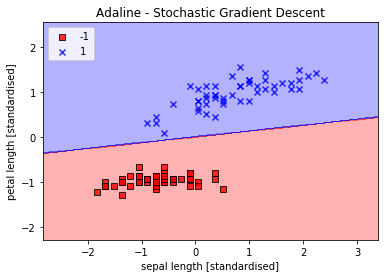

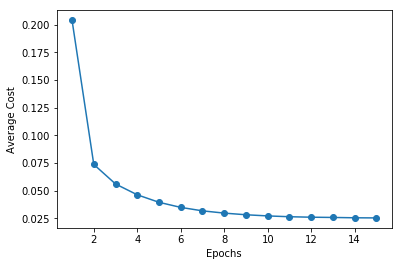

In [21]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardised]')
plt.ylabel('petal length [standardised]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

# Comment on the above code

As we can see, the average cost goes down pretty quickly, and the final decision boundary after 15 epochs looks similar to the batch gradient descent Adaline.

If we wanted to update our model, for example, in an online learning scenario, with streaming data, we could simply call the ```partial_fit``` method on individual samples.  For example:
```ada.partial_fit(X_std[0,:], y[0])```

# Summary

In this chapter, we gained a good understanding of the basic concepts of linear classifiers for supervised learning.  After we implemented a perceptron, we saw how we can train adaptive linear neurons efficiently via a vectorized implementation of the gradient descent and online learing via stochastic gradient descent.

Now that we have seen how to implement simple classifiers in Python, we are ready to move on to the next chapter, where we will use the Python scikit-learn machine learning library to get access to more advanced and powerful machine learning classifiers that are commonly used in the academia as well as in the industry.  The OOP approach that we used to implement the perceptron and Adaline algorithms will help with the understandin gthe sciki-learn API, which is implemented based on the same core concepts that we used in this chapter: the ```fit``` and ```predict``` methods.  Based on these core concepts, we will learn about logistic regression for modelling class probabilities and support vector machines for working with nonlinear decision boundaries.  In addition, we will introduce a different class of supervised learing algorithms, tree-based algorithms, which are commonly combined into robust ensemble classifiers.